In [12]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sn

In [16]:
#Helper functions
def normConf(conf):
    outputConf = np.zeros([5,5])
    accsum = 0
    for i in range(len(conf)):
        #for j in range(len(conf[i])):
            #outputConf[i][j] = (conf[i][j])/sum(conf[i])
        accsum += conf[i][i]
    print("Acc: ", accsum/sum(conf))
    return conf


def plotConf(conf):
    df_cm = pd.DataFrame(conf, index = [i for i in "ABCDE"],
                  columns = [i for i in "ABCDE"])
    plt.figure(figsize = (10,7))
    ax = plt.axes()
    sn.heatmap(df_cm, annot=True,fmt='g')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    plt.show()
    return


def leaveOneOut(X,y,username):
    #Leave-One-Group-Out Cross Validation
    logo = model_selection.GroupKFold(n_splits=6)
    model = tree.DecisionTreeClassifier()
    ypred = model_selection.cross_val_predict(model,X, y, cv=logo, groups=username)
    conf = metrics.confusion_matrix(y, ypred)
    print(metrics.accuracy_score(y,ypred))
    print(metrics.classification_report(y, ypred))
    #normConf(conf)
    plotConf(conf)
    return


def kcrossfold(X,y):
    #K-fold Cross Validation
    model = tree.DecisionTreeClassifier()
    ypred = model_selection.cross_val_predict(model,X, y, cv=10)
    conf = metrics.confusion_matrix(y, ypred)
    print(metrics.accuracy_score(y,ypred))
    print(metrics.classification_report(y, ypred))
    #normConf(conf)
    plotConf(conf)
    return

def loadAndFormat(filename):
    #load in a csv file of data and generate our X, y
    data = pd.read_csv(filename,header=0)
    noNA = data.replace("#DIV/0!", np.nan)
    noNA = noNA.dropna(axis='columns')
    username = noNA.user_name
    y = noNA.classe
    
    if 'stats' in filename:
        X = noNA.drop(columns=['classe', 'user_name'])
    else:
        X = noNA.drop(columns=['user_name', 'classe', 'num_window'])
        
    return X,y,username

Size of X: (839, 67)
Size of y: (839,)


LEAVE ONE OUT
0.2860548271752086
              precision    recall  f1-score   support

           A       0.38      0.31      0.34       240
           B       0.29      0.34      0.31       161
           C       0.28      0.47      0.35       145
           D       0.15      0.13      0.14       137
           E       0.27      0.16      0.20       156

    accuracy                           0.29       839
   macro avg       0.27      0.28      0.27       839
weighted avg       0.29      0.29      0.28       839



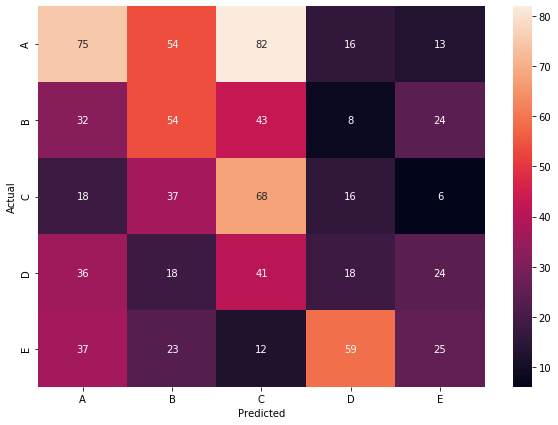

CROSS VALIDATION
0.7771156138259833
              precision    recall  f1-score   support

           A       0.85      0.83      0.84       240
           B       0.73      0.74      0.73       161
           C       0.70      0.74      0.72       145
           D       0.73      0.71      0.72       137
           E       0.83      0.83      0.83       156

    accuracy                           0.78       839
   macro avg       0.77      0.77      0.77       839
weighted avg       0.78      0.78      0.78       839



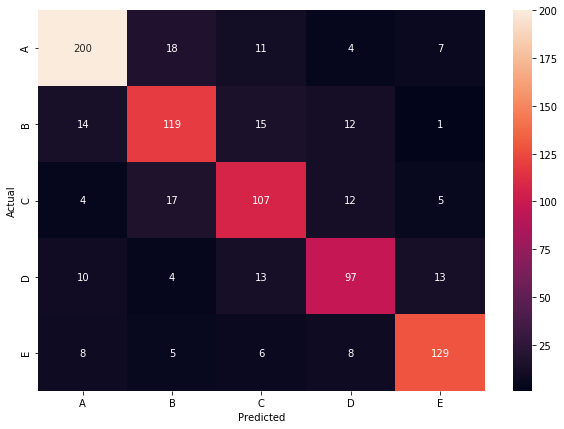

In [30]:
filename = "stats.csv"
X,y,username = loadAndFormat(filename)
print("Size of X: {0}".format(X.shape))
print("Size of y: {0}".format(y.shape))

print('\n')
print('='*70)
print("LEAVE ONE OUT")
print('='*70)
leaveOneOut(X,y,username)

print('='*70)
print("CROSS VALIDATION")
print('='*70)
kcrossfold(X,y)



Size of X: (39242, 51)
Size of y: (39242,)


LEAVE ONE OUT
0.3264104785688803
              precision    recall  f1-score   support

           A       0.53      0.33      0.41     11159
           B       0.28      0.34      0.31      7593
           C       0.38      0.14      0.21      6844
           D       0.23      0.09      0.13      6432
           E       0.28      0.69      0.40      7214

    accuracy                           0.33     39242
   macro avg       0.34      0.32      0.29     39242
weighted avg       0.36      0.33      0.31     39242



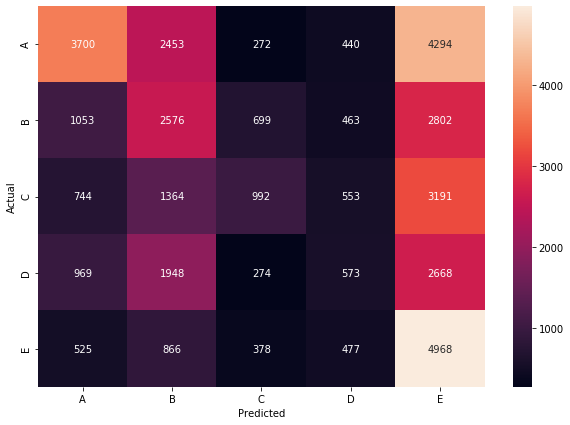

CROSS VALIDATION
0.9807858926660211
              precision    recall  f1-score   support

           A       0.99      0.99      0.99     11159
           B       0.97      0.97      0.97      7593
           C       0.97      0.97      0.97      6844
           D       0.98      0.98      0.98      6432
           E       0.99      0.98      0.98      7214

    accuracy                           0.98     39242
   macro avg       0.98      0.98      0.98     39242
weighted avg       0.98      0.98      0.98     39242



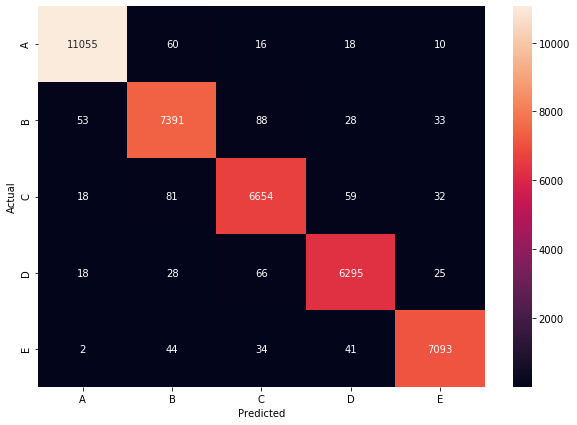

In [31]:
filename = "raw.csv"
X,y,username = loadAndFormat(filename)
print("Size of X: {0}".format(X.shape))
print("Size of y: {0}".format(y.shape))

print('\n')
print('='*70)
print("LEAVE ONE OUT")
print('='*70)
leaveOneOut(X,y,username)

print('='*70)
print("CROSS VALIDATION")
print('='*70)
kcrossfold(X,y)